# ELE435/535 2019, LAB 8: Kernel Methods

## Francisco Carrillo

## Main Parts of the LAB:
## 1) Kernel-PCA on synthetic data
## 2) Kernel-SVM on MNIST
## 3) Kernel-nearest neighbor on Liver Disorders Dataset
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************


## 1) Kernel-PCA

In this assignment, we will study the effectiveness of kernel PCA.

**1-1)** Import the given data "LAB8_data_PCA.npy" into numpy. It contains 1000 points, the first 500 of which belongs to class #1 and the rest belongs to class #2. Each row corresponds to one data point.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from scipy.linalg import eigh
from scipy.spatial.distance import pdist, squareform
from time import time
import datetime
%matplotlib inline

In [3]:
data = np.load("LAB8_data_PCA.npy")
print("total data shape: ", data.shape)

data1 = data[:500,:]
data2 = data[500:,:]

print("data 1 shape: ", data1.shape)
print("data 2 shape: ", data2.shape)

total data shape:  (1000, 3)
data 1 shape:  (500, 3)
data 2 shape:  (500, 3)


**1-2)** Visualize the data in 3D. Use different colors for objects from distinct classes.

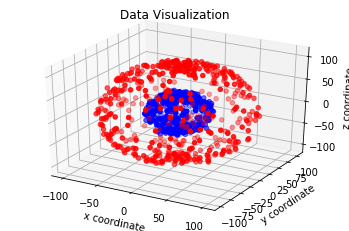

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:,0], data1[:,1], data1[:,2], c='r')
ax.scatter(data2[:,0], data2[:,1], data2[:,2], c='b') #, marker='x')

ax.set_title('Data Visualization')
ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_zlabel('z coordinate')
plt.show()


**1-3)** Now perform a normal PCA (i.e. linear PCA) over the data (you may use sklearn's built-in commands for this part). Then project the data onto the span of the first two principal components. Visualize the projected data in 2D. 

Shape PCA Data: (1000, 2)


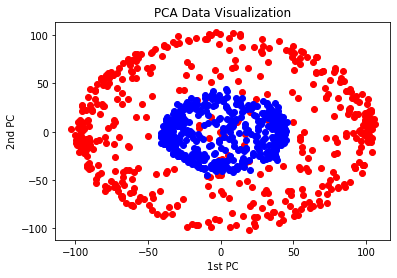

Estimated running time:0:00:00.146189


In [5]:
from sklearn.decomposition import PCA
start = time()

#Your Code Here

#performing PCA (addapted from last homework)
pca = PCA(n_components=2)
dataPCA = pca.fit_transform(data)
print("Shape PCA Data:", dataPCA.shape)

plt.figure()
plt.scatter(dataPCA[:500,0], dataPCA[:500,1], c='r')
plt.scatter(dataPCA[500:,0], dataPCA[500:,1], c='b')

plt.title('PCA Data Visualization')
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

**1-4)** Now, perform kernel PCA with a 4-th order inhomogeneous polynomial kernel. Then, project the data onto the span of first two principal components and visualize the projected data in 2D **(do not use sklearn's built-in commands for this part; follow the steps mentioned in the notes, e.g. find the Gram matrix of the centered data, then use SVD, etc.)**

size of Gramm Matrix:  (1000, 1000)
Shape of Principal Compenets:  (1000, 2)


C:\Users\Franj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


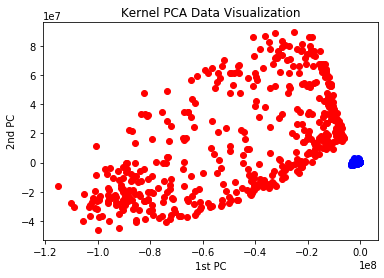

Estimated running time:0:00:00.267563


In [34]:
start = time()

# Your Code Here (adapted some code from Hw #2 and https://sebastianraschka.com/Articles/2014_kernel_pca.html)

pComponents = 2

#centering data
mean = data.mean()
cData = data - mean

#finding Gramm Matrix of centered data: 1000 by 3
K1 = (1+ cData @ cData.T)**4
print("size of Gramm Matrix: ",K1.shape,)

#finding eigenvectors
eVal, eVec = eigh(K1)

#finding Principal Components
PrincipalComponents = np.column_stack((eVec[:,-i]*(eVal[-i]**0.5) for i in range(1,pComponents+1)))
print("Shape of Principal Compenets: ",PrincipalComponents.shape)

#plotting
plt.figure()
plt.scatter(PrincipalComponents[:500,0], PrincipalComponents[:500,1], c='r')
plt.scatter(PrincipalComponents[500:,0], PrincipalComponents[500:,1], c='b')

plt.title('Kernel PCA Data Visualization')
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

**1-5)** Implement kernel PCA with the RBF kernel **(do not use sklearn's built-in commands; follow the steps in the notes--similar to what you did in the previous part) **
$(k(x,z) = e^{-\gamma \lVert {x-z} \lVert_2^2}, \gamma = 1/2\sigma^2)$.
Choose sigma to be 10, 30, and 100. Also, visualize the projected data onto the span of the first two principal components for each value of sigma.

C:\Users\Franj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


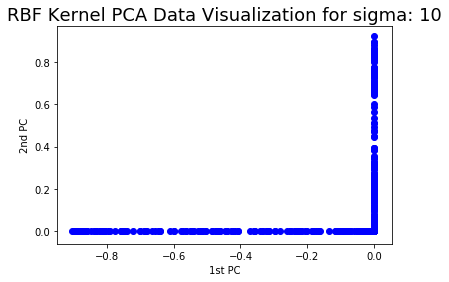

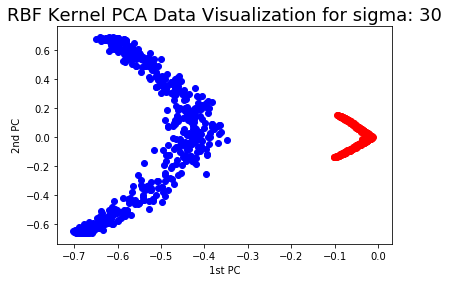

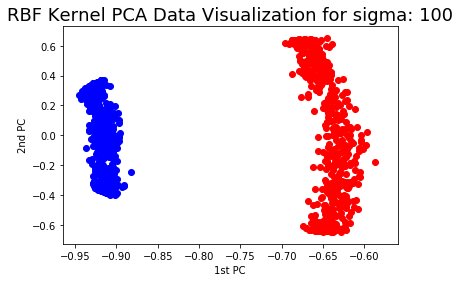

Estimated running time:0:00:00.768030


In [54]:
start = time()

# Your Code Here (adapted some code from Hw #2 and https://stats.stackexchange.com/questions/15798/how-to-calculate-a-gaussian-kernel-effectively-in-numpy

#centering data
mean = data.mean()
cData = data - mean

def rbfPCA(n_Componets, Sigma, cData):
    
    #finding Gramm Matrix of centered data: 1000 by 3
    gamma = 1/(2*Sigma**2)
    distances = squareform(pdist(cData, 'sqeuclidean'))
    K = np.exp(-gamma*distances)

    #finding eigenvectors
    eVal, eVec = eigh(K)

    #finding Principal Components
    PrincipalComponents = np.column_stack((eVec[:,-i]*(eVal[-i]**0.5) for i in range(1,pComponents+1)))
    
    return PrincipalComponents

#plotting
sigmaList = [10,30,100]
for sigma in sigmaList:

    PC = rbfPCA(2,sigma,cData)
    
    plt.figure()
    plt.scatter(PC[:500,0], PC[:500,1], c='r')
    plt.scatter(PC[500:,0], PC[500:,1], c='b')

    plt.title('RBF Kernel PCA Data Visualization for sigma: ' + str(sigma),fontsize=18)
    plt.xlabel('1st PC')
    plt.ylabel('2nd PC')
    plt.show()

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

**1-6)** How can you estimate a suitable value of sigma given a dataset, i.e. give a method to estimate an appropriate value of sigma given some training data points.  

ANS: Through pair-wise distances between original data samples.

## 2) Kernel-SVM on MNIST

In this part, we will use kernel-SVM to classify MNIST digits. 


**2-1)** First, import the subset of MNIST dataset that we were working on in the previous labs. 

In [89]:
train_data = np.load('MNISTcwtrain1000.npy')
train_data = train_data.astype(dtype='float64')
test_data = np.load('MNISTcwtest100.npy')
test_data = test_data.astype(dtype='float64')

train_data = train_data/255.0
test_data = test_data/255.0


**2-2)** Report classification accuracy on the testing data using kernel-SVM with a 'linear' kernel. (you may use sklearn's built-in commands for this part)

In [99]:
from sklearn import svm

start = time()

labels = range(0,10)
train_labels = np.repeat(labels,1000)
test_labels = np.repeat(labels,100)

kernel='linear'
clf = svm.SVC(kernel=kernel)
clf.fit(train_data.T, train_labels)
pred_test_labels = clf.predict(test_data.T)
Acc =1- (np.mean(np.count_nonzero(test_labels-pred_test_labels))/1000)
print("Accuracy :::: "+str(Acc))

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Accuracy :::: 0.911
Estimated running time:0:00:13.770852


**2-3)** Now, use SVM with 'rbf' kernel. Select three different values of 'gamma' and report (print out) how the test accuracy changes (you may use sklearn's built-in commands for this part.). Hint: In order to get a feeling for selecting an appropriate value for gamma, take a look at http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

In [100]:
start = time()

# Your Code Here

n_features = train_data.shape[0]
gamma1 = 1/(n_features * train_data.T.var())

kernel='rbf'
clf = svm.SVC(kernel=kernel, gamma = gamma1)
clf.fit(train_data.T, train_labels)
pred_test_labels = clf.predict(test_data.T)
Acc =1- (np.mean(np.count_nonzero(test_labels-pred_test_labels))/1000)
print("gamma ::: "+str(round(gamma1,5)))
print("Accuracy :::: "+str(Acc))

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

gamma ::: 0.01331
Accuracy :::: 0.947
Estimated running time:0:00:23.858755


In [103]:
start = time()

# Your Code Here
gamma2 = 1/(n_features)

kernel='rbf'
clf = svm.SVC(kernel=kernel, gamma = gamma2)
clf.fit(train_data.T, train_labels)
pred_test_labels = clf.predict(test_data.T)
Acc =1- (np.mean(np.count_nonzero(test_labels-pred_test_labels))/1000)
print("gamma ::: "+ str(round(gamma2,5)))
print("Accuracy :::: "+str(Acc))

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

gamma ::: 0.00128
Accuracy :::: 0.896
Estimated running time:0:00:35.120224


In [104]:
start = time()

gamma3 = 10*gamma1 

kernel='rbf'
clf = svm.SVC(kernel=kernel, gamma = gamma3)
clf.fit(train_data.T, train_labels)
pred_test_labels = clf.predict(test_data.T)
Acc =1- (np.mean(np.count_nonzero(test_labels-pred_test_labels))/1000)
print("gamma ::: "+str(round(gamma3,5)))
print("Accuracy :::: "+str(Acc))

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

gamma ::: 0.13307
Accuracy :::: 0.7150000000000001
Estimated running time:0:02:30.521235


In [106]:
print("ANSWER: The Value of gamma can significantly change the accuracy of the predictions. We found that scaling gamma by the number of samples AND the variance of the data is better than just scaling by the number of samples. Also, values of gamma that are too large or too small compared to the correct scaling can negatively affect the accuracy of the predicitons.  ")

ANSWER: The Value of gamma can significantly change the accuracy of the predictions. We found that scaling gamma by the number of samples AND the variance of the data is better than just scaling by the number of samples. Also, values of gamma that are too large or too small compared to the correct scaling can negatively affect the accuracy of the predicitons.  


# 3) Kernel NN Classifier on Liver Disorders Data Set

In this part, we will be working with BUPA Liver Disorder database from BUPA Medical Research Ltd. (http://archive.ics.uci.edu/ml/datasets/Liver+Disorders). It contains data from 345 male individuals. We have selected the first 245 samples to form the training data and the rest as testing data. 

The first 5 features are results from blood tests. They are sensitive to liver disorders that may arise from excessive alcohol consumption. The sixth feature is the number of drinks per day. The last column specifies whether someone has the disorder or not.

In [108]:
data = np.loadtxt("Liver_Dataset.txt")
train_data = data[0:245,:6]
train_labels = data[0:245,6]
test_data = data[245:,0:6]
test_labels = data[245:,6]

**3-1)** Implement 1-nearest neighbor classifier and report the testing accuracy. You may use sklearn's built-in commands for this part.

In [109]:
from sklearn.neighbors import KNeighborsClassifier
start = time()

# Your Code Here
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_data,train_labels)
pred = model.predict(test_data)
acc = model.score(test_data,test_labels)
print("Testing Accuracy: ",acc)

end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))

Testing Accuracy:  0.61
Estimated running time:0:00:00.010481


**3-2)** Implement kernel-nearest neighbor classifier using 3-th order inhomogeneous polynomial kernel. Report (print out) the testing accuracy. **Do not use sklearn for this part. Follow the steps mentioned in the notes (i.e. through forming the Gram matrix).** How much test accuracy improvement do we achieve using the polynomial kernel?

In [110]:
start = time()

# Your Code Here (adapted from Hw#2)

#Two Part function:
    #1) Make function that identifies label of nearest neighborn
    #2) Create the actual classifier function

# 1) make function that identifies the label of the nearest neighbor 
def getLabel(trainData,testSample,K): 
    
    nTrainSamples = trainData.shape[1]
    
    ##initializing array that has "kernel distances" and labels
    distanceAndLabelArray = np.zeros((nTrainSamples,2))
    distanceAndLabelArray[:,0] = train_labels #adding labels
    
    #calculating the kernel objective function "kernel distance"
    for i in range(nTrainSamples):
        #sample kernel calculation
        k = (1+trainData[:,i] @ testSample)**3 
        
        #adding value of objective function to the array
        distanceAndLabelArray[i,1] = -(2*k-K[i,i]) 
        
    #sorting distances and the labels
    distanceAndLabelArray = distanceAndLabelArray[distanceAndLabelArray[:,1].argsort()] 
    
    #choosing best label based on closest distance
    bestLabel = distanceAndLabelArray[0,0]
    return bestLabel
   
# 2) Coding the classifier
def kernelKNN(trainData, testData):
    nTestSamples = testData.shape[1]
    resultLabels = np.zeros((1,nTestSamples))
    
    #calculating Gramm Matrix
    K = (1+ data @ data.T)**3

    #get label of nearest neighbor
    for j in range(nTestSamples):
        resultLabels[:,j] =  getLabel(trainData,testData[:,j],K) 
        
    #calculating accuracy    
    accuracy = np.sum( test_labels == resultLabels) / nTestSamples
    return resultLabels, accuracy
        
labels, accuracy = kernelKNN(train_data.T, test_data.T)

print("\nANSWER: The accuracy is", accuracy, "this is about 2% better than the standard classifier \n")
    
end = time()
print('Estimated running time:' + str(datetime.timedelta(seconds=end - start)))



ANSWER: The accuracy is 0.63 this is about 2% better than the standard classifier 

Estimated running time:0:00:00.071039
